In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.utils.validation import column_or_1d

In [23]:
"""
CSV_PATH = "complete-frame.csv"

frame = pd.read_csv(CSV_PATH, sep=",")

columns = [frame.mutation,frame.no_mutations, frame.line_coverage, frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability]
    
frame = pd.concat(columns, axis = 1)

x = pd.concat([frame.no_mutations #, frame.line_coverage,
               ,frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability], axis = 1)

y = pd.concat([frame.mutation], axis = 1)
"""

#Join CSVs

CSV_PATH = "complete-frame.csv"

CSV_PATH1 = "testminereffectiveness.csv"

def label_race (row):
    return row['path_test'].split('/')[len(row['path_test'].split('/')) - 1].split('.')[0]

frame1 = pd.read_csv(CSV_PATH, sep=',')
frame1 = frame1.sample(frac=1).reset_index(drop=True) 

frame1['TestClassName'] = frame1.apply(lambda row: label_race(row), axis=1)

frame2 = pd.read_csv(CSV_PATH1, sep=',')

frame = pd.merge(frame1, frame2, on='TestClassName')

frame = frame.drop(['project', 'module', 'path_test','test_name','path_src',
                    'class_name','TestClassName','commit','Nº','Project'], axis=1)




In [24]:
frame.head()

,mutation,no_mutations,line_coverage,isAssertionRoulette,isEagerTest,isLazyTest,isMysteryGuest,isSensitiveEquality,isResourceOptimism,isForTestersOnly,...,#Mockito,#BadApi,#LOC,#Expressions,#Depth,#Vocabulary,#Understandability,#BodySize,#Dexterity,#NonWhiteCharacters
0,0.758929,112,0.876289,0,1,0,0,1,0,0,...,0.0,0.0,186.0,242.0,8.0,23.0,2091.0,323.0,3.0,1952.0
1,0.728324,173,0.763158,1,1,0,1,1,0,0,...,0.0,3.0,685.0,1551.0,13.0,90.0,16545.0,1955.0,3.0,11119.0
2,0.838384,99,0.926829,1,1,0,0,1,0,0,...,0.0,0.0,248.0,619.0,10.0,58.0,5350.0,791.0,3.0,5039.0
3,0.555556,27,0.842105,1,0,0,0,0,0,0,...,0.0,0.0,94.0,308.0,13.0,28.0,4344.0,462.0,2.0,1857.0
4,0.500000,60,1.000000,0,0,0,1,0,0,0,...,3.0,0.0,60.0,188.0,10.0,32.0,1779.0,251.0,3.0,1892.0


In [25]:
print(frame.shape)

(2245, 84)


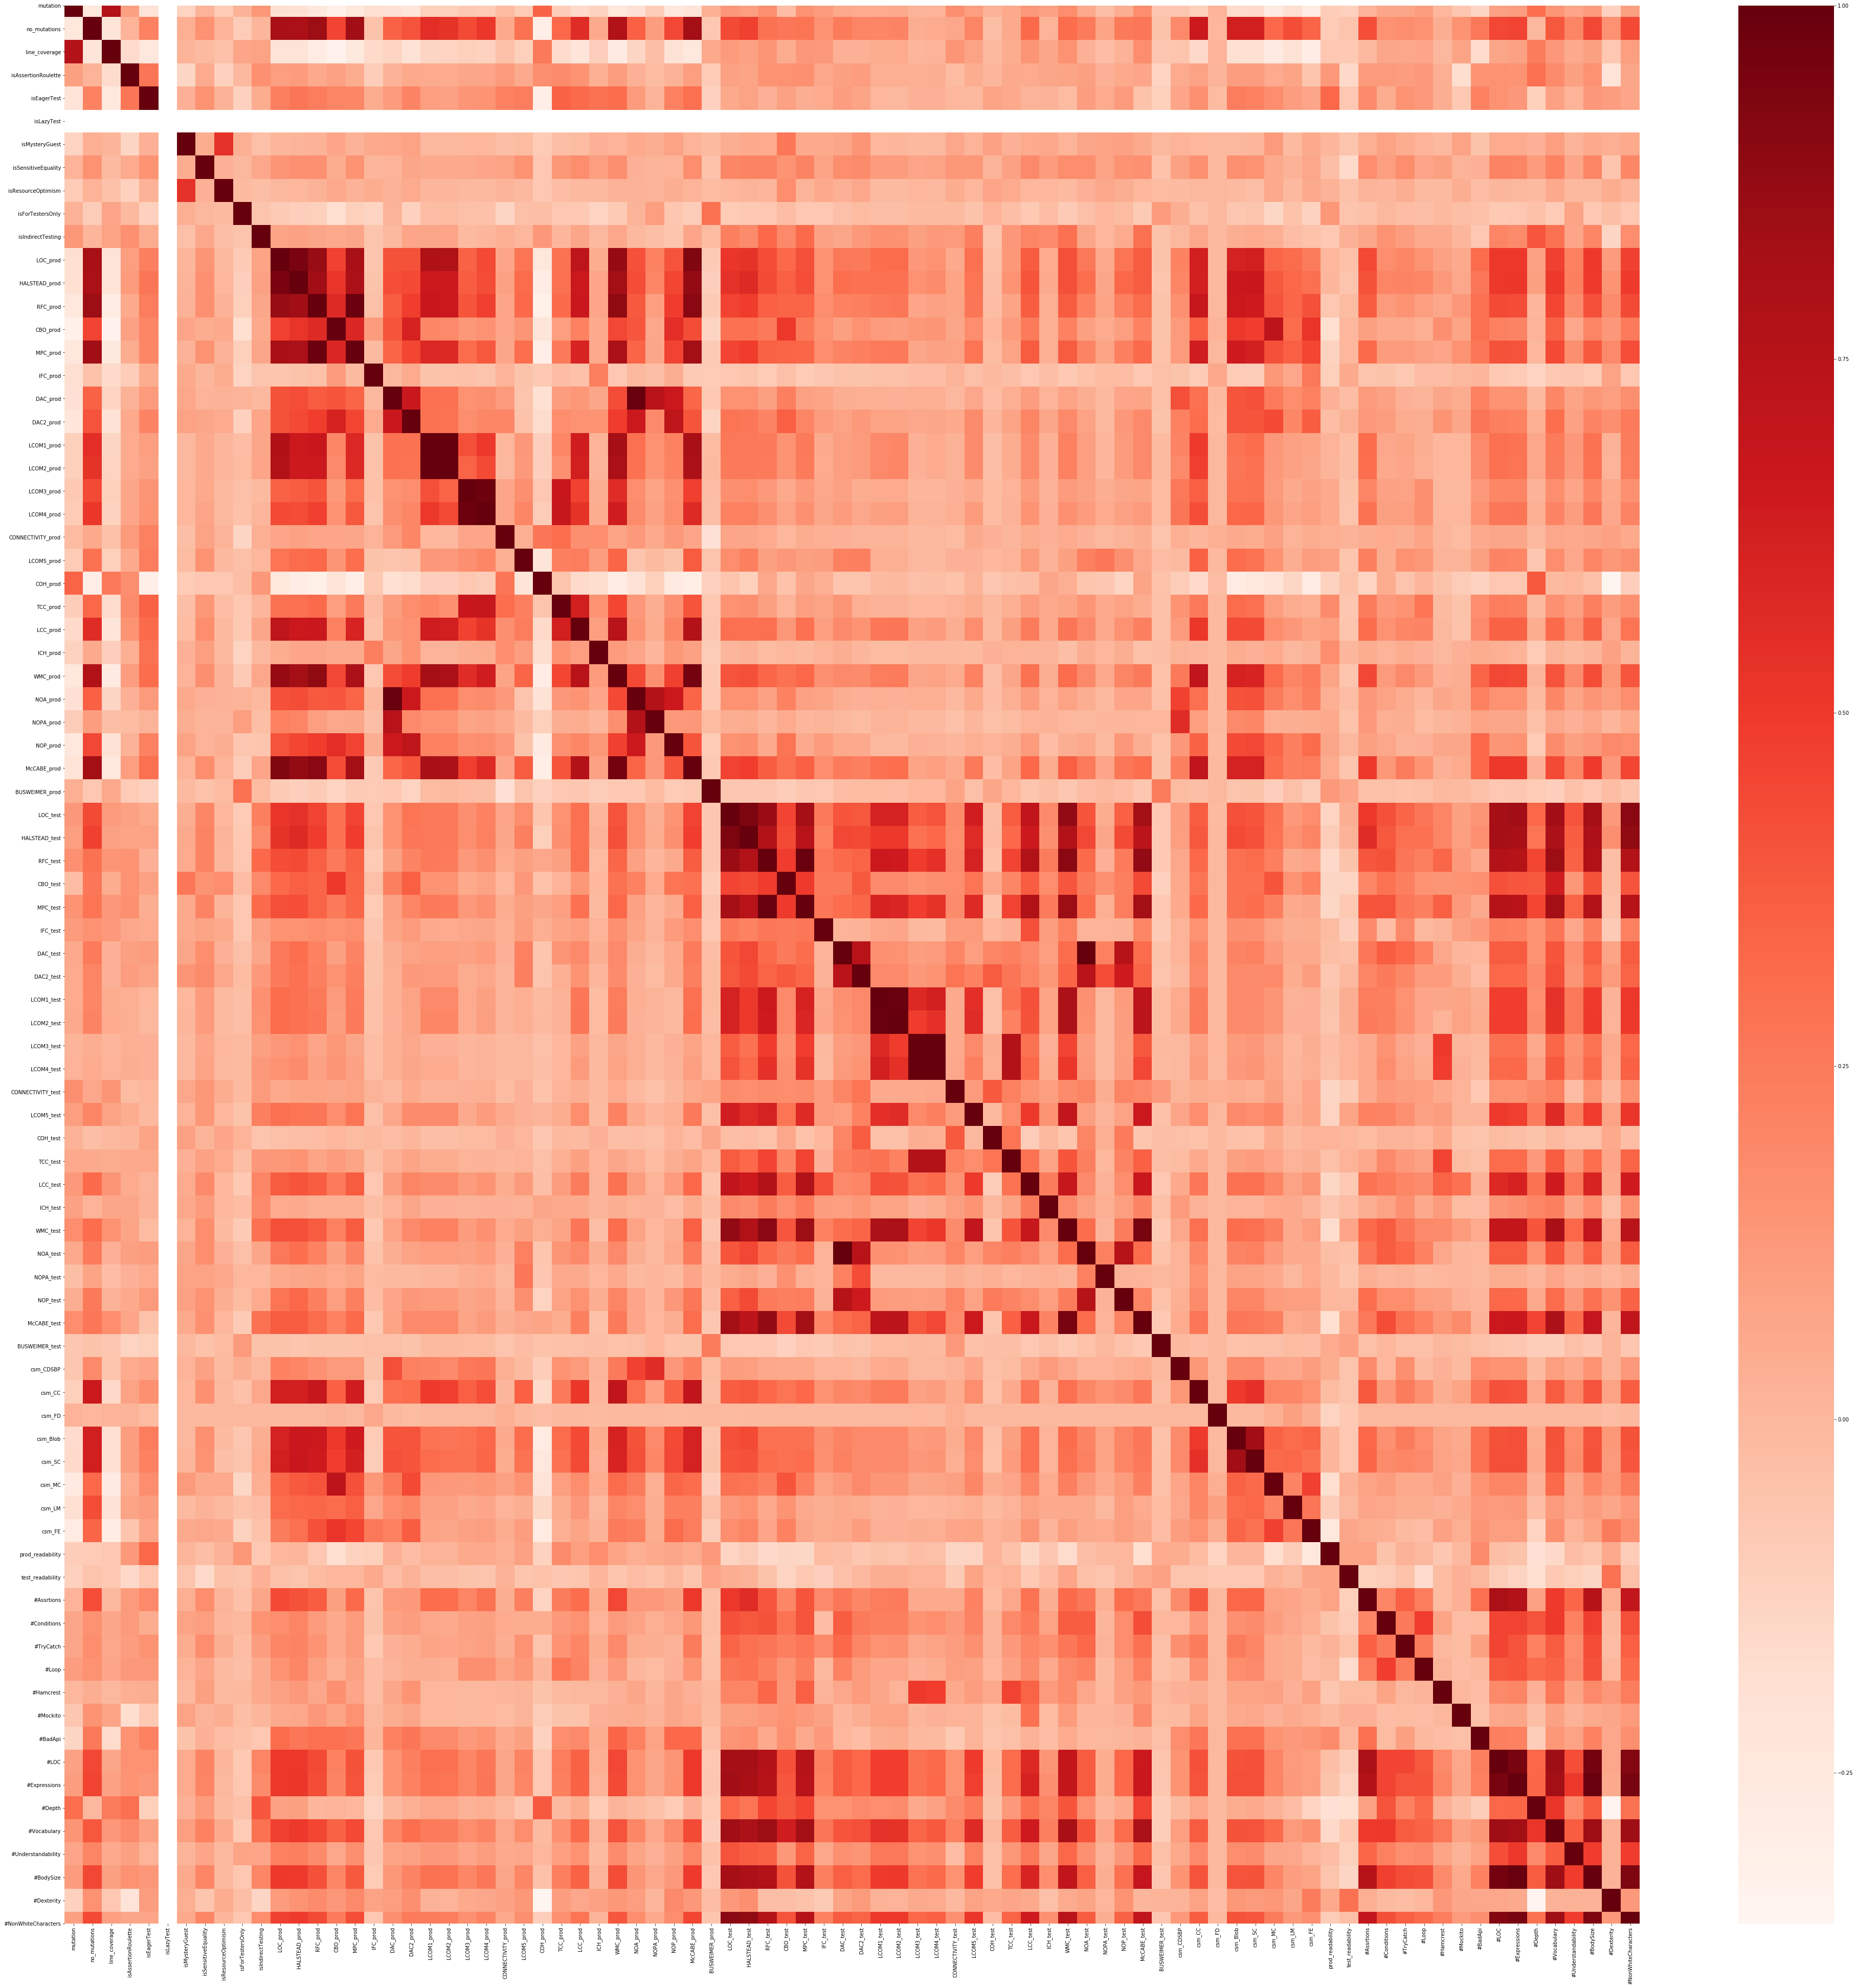

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(69,69))
cor = frame.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(cor["mutation"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

mutation             1.000000
no_mutations         0.237811
line_coverage        0.769369
isEagerTest          0.209183
isMysteryGuest       0.126508
isIndirectTesting    0.134748
LOC_prod             0.186584
HALSTEAD_prod        0.190177
RFC_prod             0.246686
CBO_prod             0.314361
MPC_prod             0.236408
IFC_prod             0.183626
DAC_prod             0.193039
DAC2_prod            0.231517
LCOM1_prod           0.112441
LCOM2_prod           0.107998
COH_prod             0.345971
LCC_prod             0.159639
ICH_prod             0.118556
WMC_prod             0.237383
NOA_prod             0.196216
NOP_prod             0.251820
McCABE_prod          0.211575
LOC_test             0.130335
HALSTEAD_test        0.103506
RFC_test             0.158571
MPC_test             0.149458
IFC_test             0.109771
CONNECTIVITY_test    0.164694
LCC_test             0.123534
WMC_test             0.176967
McCABE_test          0.171779
csm_CC               0.110666
csm_Blob  

In [28]:
x = frame.drop(['mutation'], axis=1)
y = pd.concat([frame.mutation], axis = 1)

x = x.fillna(0)
y = column_or_1d(y, warn=False)
    
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True False  True  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True  True False False False False
 False False False False False False False False False False False]
[50  1  1 11 74  1  9  1  1 12 57 69 47 35 46 27 24 14 52 53 54 71  6 31
  1 33 32 26 51 25 21 23 59  1 55 72 44 19 43 63 41 30 68 67 58 66  4 39
 10 36 38 18 37 45 22 20 65 34  2 13 16  8  7  3  1 15  1  1 49 28 42 29
 60 17 48 62 64 56 40 73 61  5 70]


In [30]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.651609


In [33]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['line_coverage', 'isAssertionRoulette', 'isMysteryGuest', 'COH_prod',
       'prod_readability'],
      dtype='object')


In [ ]:
#Join CSVs

CSV_PATH = "complete-frame.csv"

CSV_PATH1 = "testminereffectiveness.csv"

def label_race (row):
    return row['path_test'].split('/')[len(row['path_test'].split('/')) - 1].split('.')[0]

frame1 = pd.read_csv(CSV_PATH, sep=',')
frame1 = frame.sample(frac=1).reset_index(drop=True) 

frame1['TestClassName'] = frame1.apply(lambda row: label_race(row), axis=1)

frame2 = pd.read_csv(CSV_PATH1, sep=',')

result = pd.merge(frame1, frame2, on='TestClassName')

result.drop(['project', 'module', 'path_test','test_name','path_src','class_name','TestClassName','commit'], axis=1)
